# Support Vector Machine Models

**Support vector machines (SVMs)** are a widely used and powerful category of machine learning algorithms. There are many variations on the basic idea of an SVM. An SVM attempts to **maximally seperate** classes by finding the **suport vector** with the lowest error rate or maximum separation. SVMs can use many types of **kernel functions**. The most common kernel functions are **linear** and the **radial basis function** or **RBF**. The linear basis function attempts to separate classes by finding hyperplanes in the feature space that maximally separate classes. The RBF uses set of local Gaussian shaped basis kernels to find a nonlinear separation of the classes. 

## Example: Iris dataset

As a first example you will use SVMs to classify the species of iris flowers. 

As a first step, execute the code in the cell below to load the required packages to run the rest of this notebook. 

In [1]:
from sklearn import svm, preprocessing
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr

%matplotlib inline

To get a feel for these data, you will now load and plot them. The code in the cell below does the following:

1. Loads the iris data as a Pandas data frame. 
2. Adds column names to the data frame.
3. Displays all 4 possible scatter plot views of the data. 

Execute this code and examine the results. 

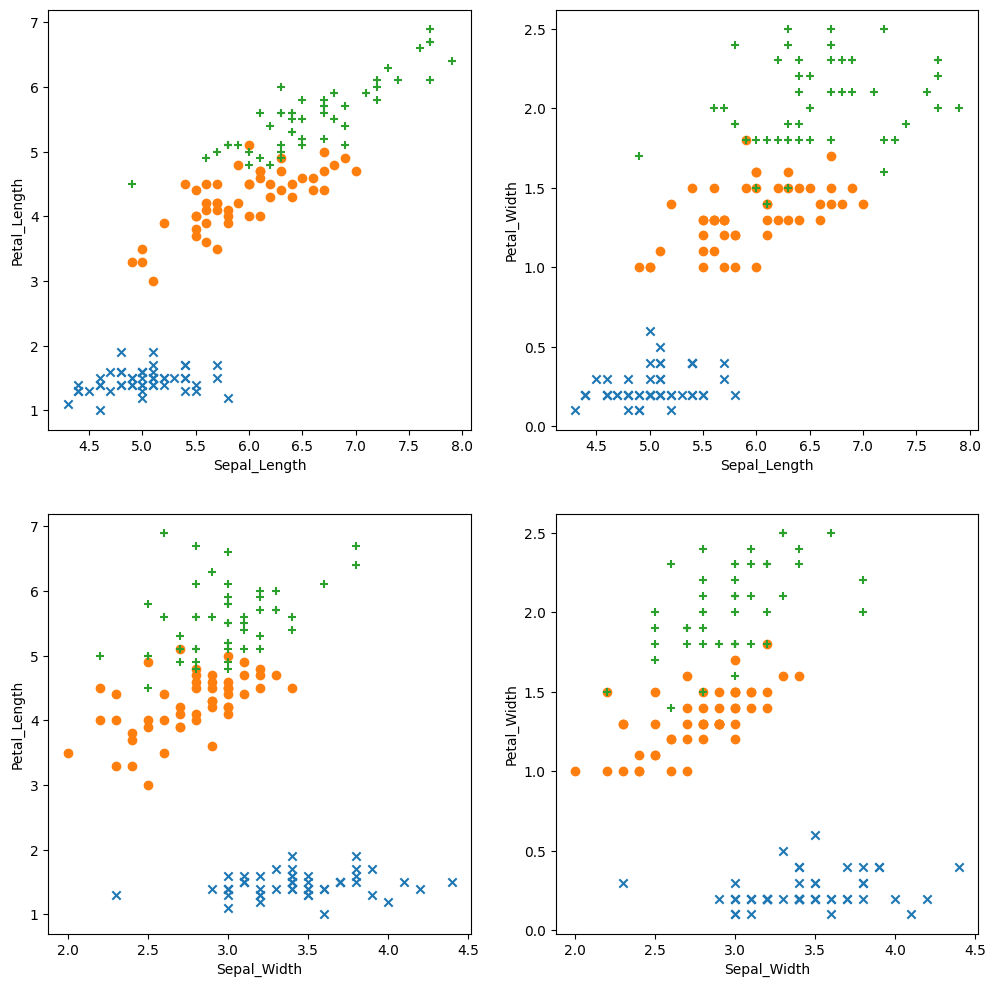

In [2]:
def plot_iris(iris):
    '''Function to plot iris data by type'''
    setosa = iris[iris['Species'] == 'setosa']
    versicolor = iris[iris['Species'] == 'versicolor']
    virginica = iris[iris['Species'] == 'virginica']
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    for i in range(2):
        for j in range(2):
            ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = 'x')
            ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = 'o')
            ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = '+')
            ax[i,j].set_xlabel(x_ax[i])
            ax[i,j].set_ylabel(y_ax[j])
            
## Import the dataset from sklearn.datasets
iris = datasets.load_iris()

## Create a data frame from the dictionary
species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['Species'] = species

## Plot views of the iris data            
plot_iris(iris)   

You can see that Setosa (in blue) is well separated from the other two categories. The Versicolor (in orange) and the Virginica (in green) show considerable overlap. The question is how well our classifier will separate these categories. 

Scikit Learn classifiers require numerically coded numpy arrays for the features and as a label. The code in the cell below does the following processing:
1. Creates a numpy array of the features.
2. Numerically codes the label using a dictionary lookup, and converts it to a numpy array. 

Execute this code.

In [3]:
Features = np.array(iris[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']])

levels = {'setosa':0, 'versicolor':1, 'virginica':2}
Labels =  np.array([levels[x] for x in iris['Species']])

Next, execute the code in the cell below to split the dataset into test and training set. Notice that unusually, 100 of the 150 cases are being used as the test dataset. 

In [4]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 100)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

As is always the case with machine learning, numeric features  must be scaled. The code in the cell below performs the following processing:

1. A Zscore scale object is defined using the `StandarScaler` function from the Scikit Learn preprocessing package. 
2. The scaler is fit to the training features. Subsequently, this scaler is used to apply the same scaling to the test data and in production. 
3. The training features are scaled using the `transform` method. 

Execute this code.

In [5]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

Now you will define and fit a linear SVM model. The code in the cell below defines a linear SVM object using the `LinearSVC` function from the Scikit Learn SVM  package, and then fits the model. Execute this code.

In [6]:
nr.seed(1115)
svm_mod = svm.LinearSVC()
svm_mod.fit(X_train, y_train)

LinearSVC()

Notice that the SVM model object hyper parameters are displayed. 

Next, the code in the cell below performs the following processing to score the test data subset:
1. The test features are scaled using the scaler computed for the training features. 
2. The `predict` method is used to compute the scores from the scaled features. 

Execute this code. 

In [7]:
X_test = scale.transform(X_test)
scores = svm_mod.predict(X_test)

It is time to evaluate the model results. Keep in mind that the problem has been made difficult deliberately, by having more test cases than training cases. 

The iris data has three species categories. Therefore it is necessary to use evaluation code for a three category problem. The function in the cell below extends code from pervious labs to deal with a three category problem. Execute this code and examine the results.

In [8]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score Setosa   Score Versicolor    Score Virginica')
    print('Actual Setosa      %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual Versicolor  %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual Vriginica   %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Setosa  Versicolor  Virginica')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_3(y_test, scores)   

                 Confusion matrix
                 Score Setosa   Score Versicolor    Score Virginica
Actual Setosa          34                1                 0
Actual Versicolor       0               24                10
Actual Vriginica        0                3                28

Accuracy        0.86
 
          Setosa  Versicolor  Virginica
Num case   35.00     34.00      31.00
Precision   1.00      0.86       0.74
Recall      0.97      0.71       0.90
F1          0.99      0.77       0.81


Examine these results. Notice the following:
1. The confusion matrix has dimension 3X3. You can see that most cases are correctly classified. 
2. The overll accuracy is 0.86. Since the classes are roughly balanced, this metric indicates relatively good performance of the classifier, particularly since it was only trained on 50 cases. 
3. The precision, recall and  F1 for each of the classes is relatively good. Versicolor has the worst metrics since it has the largest number of misclassified cases. 

To get a better feel for what the classifier is doing, the code in the cell below displays a set of plots showing correctly (as '+') and incorrectly (as 'o') cases, with the species color-coded. Execute this code and examine the results. 

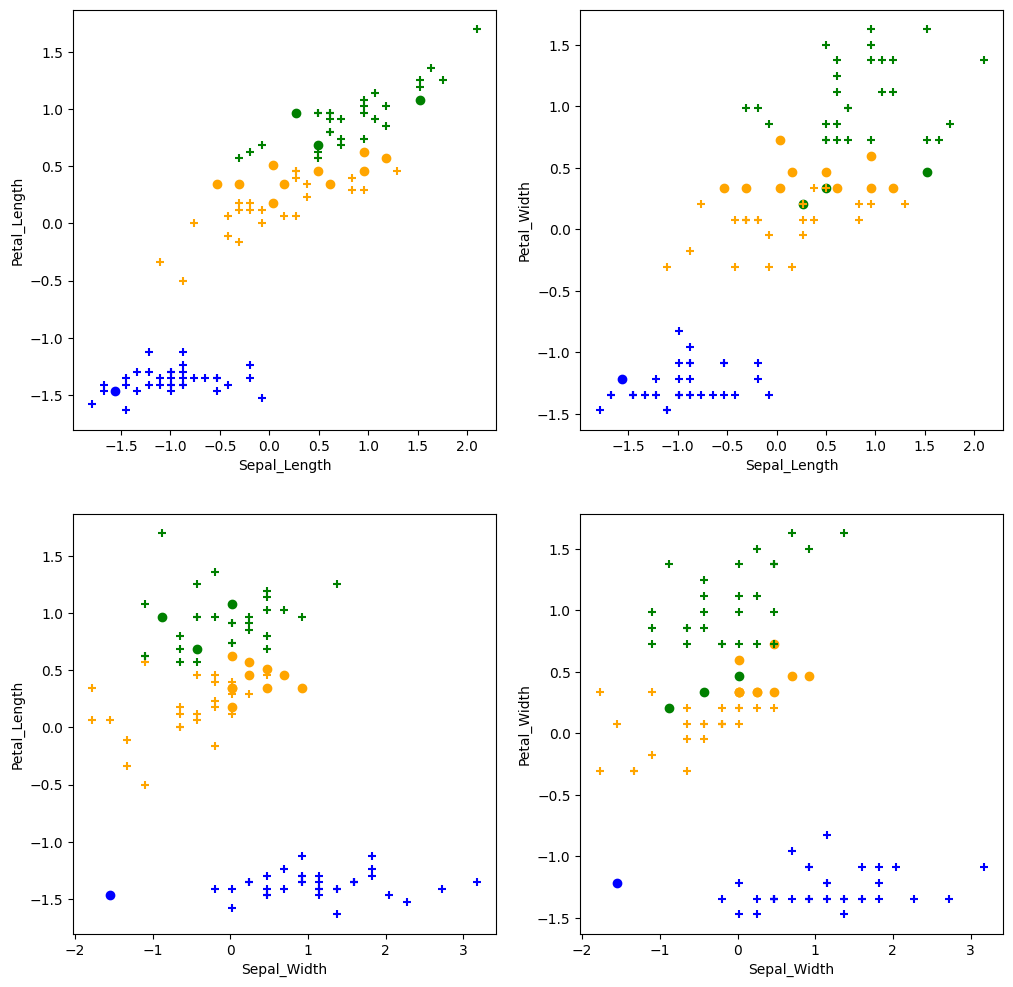

In [9]:
def plot_iris_score(iris, y_test, scores):
    '''Function to plot iris data by type'''
    ## Find correctly and incorrectly classified cases
    true = np.equal(scores, y_test).astype(int)
    
    ## Create data frame from the test data
    iris = pd.DataFrame(iris)
    levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
    iris['Species'] = [levels[x] for x in y_test]
    iris.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
    
    ## Set up for the plot
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    markers = ['o', '+']
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    
    for t in range(2): # loop over correct and incorect classifications
        setosa = iris[(iris['Species'] == 'setosa') & (true == t)]
        versicolor = iris[(iris['Species'] == 'versicolor') & (true == t)]
        virginica = iris[(iris['Species'] == 'virginica') & (true == t)]
        # loop over all the dimensions
        for i in range(2):
            for j in range(2):
                ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = markers[t], color = 'blue')
                ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = markers[t], color = 'orange')
                ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = markers[t], color = 'green')
                ax[i,j].set_xlabel(x_ax[i])
                ax[i,j].set_ylabel(y_ax[j])

plot_iris_score(X_test, y_test, scores)

Examine these plots. You can see how the classifier has divided the feature space between the classes. Notice that most of the errors occur in the overlap region between Virginica and Versicolor. This behavior is to be expected. There is an error in classifying Setosa which is a bit surprising, and which probably arises from the projection of the division between classes. 

Is it possible that a nonlinear SVM would separate these cases better? The code in the cell below uses the `SVC` function to define a nonlinear model using radial basis function. This model is fit with the training data and displays the evaluation of the model. 

Execute this code, and answer **Question 1** on the course page.

                 Confusion matrix
                 Score Setosa   Score Versicolor    Score Virginica
Actual Setosa          34                1                 0
Actual Versicolor       0               24                10
Actual Vriginica        0                3                28

Accuracy        0.86
 
          Setosa  Versicolor  Virginica
Num case   35.00     34.00      31.00
Precision   1.00      0.86       0.74
Recall      0.97      0.71       0.90
F1          0.99      0.77       0.81


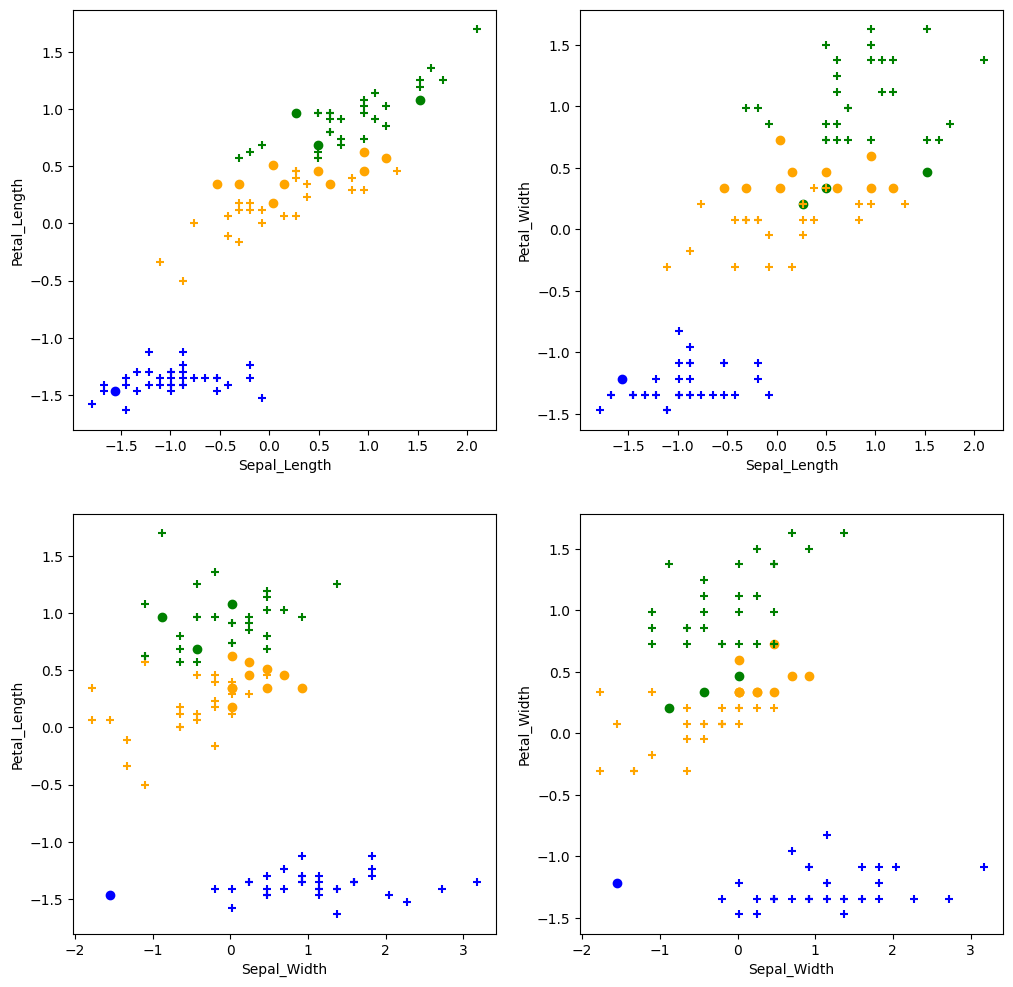

In [10]:
nr.seed(1115)
svc_mod = svm.SVC()
svc_mod.fit(X_train, y_train)
scores = svm_mod.predict(X_test)
print_metrics_3(y_test, scores) 
plot_iris_score(X_test, y_test, scores)

These results are identical to those obtained with the linear SVM model. Apparently, there is no advantage in a nonlinear SVM for these data. 

## Another example

Now, you will try a more complex example using the credit scoring data. You will use the prepared data which had the following preprocessing:
1. Cleaning missing values.
2. Aggregating categories of certain categorical variables. 
3. Encoding categorical variables as binary dummy variables.
4. Standardizing of numeric variables. 

Execute the code in the cell below to load the features and labels as numpy arrays for the example. 

In [11]:
Features = np.array(pd.read_csv('Credit_Features.csv'))
Labels = np.array(pd.read_csv('Credit_Labels.csv'))
Labels = Labels.reshape(Labels.shape[0],)
print(Features.shape)
print(Labels.shape)

(1000, 35)
(1000,)


Nested cross validation is used to estimate the optimal hyperparameters and perform model selection for the nonlinear SVM model. 5 fold cross validation is used since training SVMs are computationally intensive to train. Additional folds would give better estimates but at the cost of greater computation time. Execute the code in the cell below to define inside and outside fold objects. 

In [12]:
nr.seed(123)
inside = ms.KFold(n_splits=5, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=5, shuffle = True)

The code in the cell below estimates the best hyperparameters using 5 fold cross validation. There are two points to notice here:
1. In this case, a grid of two hyperparameters: C is the inverse of lambda of l2 regularization, and gamma is the span of the RBF kernel. 
2. Since there is a class imbalance and a difference in the cost to the bank of misclassification of a bad credit risk customer, class weights are used. 
3. The model is fit on the grid and the best estimated hyperparameters are printed. 

Execute this code, examine the result, and answer **Question 2** on the course page. 

In [13]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [1, 10, 100, 1000], "gamma":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0]}
## Define the SVM model
svc_clf = svm.SVC(class_weight = {0:0.33, 1:0.67}) 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = svc_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(Features, Labels)
print(clf.best_estimator_.C)
print(clf.best_estimator_.gamma)

10
0.02


Now, you will run the code in the cell below to perform the outer cross validation of the model. 

In [14]:
nr.seed(498)
cv_estimate = ms.cross_val_score(clf, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.774
SDT of the metric       = 0.016
Outcomes by cv fold
Fold  1    0.761
Fold  2    0.758
Fold  3    0.800
Fold  4    0.768
Fold  5    0.782


Examine these results. Notice that the standard deviation of the mean of the AUC is more than an order of magnitude smaller than the mean. This indicates that this model is likely to generalize well. 

Now, you will build and test a model using the estimated optimal hyperparameters. As a first step, execute the code in the cell below to create training and testing dataset.

In [15]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

The code in the cell below defines a nonlinear SVM model object using the estimated optimal model hyperparameters and then fits the model to the training data. Execute this code.

In [16]:
nr.seed(1115)
svm_mod = svm.SVC(C = clf.best_estimator_.C,
                  gamma = clf.best_estimator_.gamma,
                  class_weight = {0:0.33, 1:0.67},
                  probability=True) 
svm_mod.fit(X_train, y_train)

SVC(C=10, class_weight={0: 0.33, 1: 0.67}, gamma=0.02, probability=True)

As expected, the hyperparameters of the SVM model object reflect those specified. 

The code in the cell below scores and prints evaluation metrics for the model, using the test data subset. 

Execute this code, examine the results, and answer **Question 3** on the course page.

In [17]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = svm_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive       187                25
Actual negative        46                42

Accuracy        0.76
AUC             0.80
Macro precision 0.71
Macro recall    0.68
 
           Positive      Negative
Num case      212            88
Precision    0.80          0.63
Recall       0.88          0.48
F1           0.84          0.54


Overall, these performance metrics seem acceptable.  A large majority of high credit risk customers are identified, but at the cost of a large number of false positives and a low precision for the negative cases. However, one should be cautious. The reported AUC is quite a bit better than the mean achieved with the 5 fold cross validation. It is likely these figures are optimistic. 

## Summary

In this lab you have accomplished the following:
1. Used a linear and nonlinear SVM model to classify the cases of the iris data. For this particular problem there  was no difference between the linear and nonlinear models. 
2. Used 5 fold to find estimated optimal hyperparameters for a nonlinear SVM model to classify credit risk cases. The model appears to generalize well.  